### Important notice : this notebook works under @rom1lebogoss conda env and not under @autoqchem conda env...

# Import 

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
import dft_descriptors.numbering_CO as nb

# Load data : the fragment.csv corrected from step 1

In [2]:
unik_CO_df = pd.read_csv('../data_csv/fragments_corrected.csv', sep =',')

# Map the Carbon and Oxygen involved in the coupling

In [3]:
# numerotation des carbones aromatiques 0 et de l'oxygène 1
List_numbered_OC = []
n = 0
for j in range(len(unik_CO_df)):
    mol, CO_frag, ar_frag = Chem.MolFromSmiles(unik_CO_df["react"][j]), unik_CO_df["fragO"][j], unik_CO_df["fragC"][j]
    mol, wn = nb.number_C0O1(mol, CO_frag, ar_frag)
    List_numbered_OC.append([j, Chem.MolToSmiles(mol)])

# Visualise the different numbering in order to correct potentials errors

In [4]:
# better do it by slices of 200 molecules !
verif_mols = []
L=[str(i) for i in range(len(List_numbered_OC))]
for i in range(len(List_numbered_OC)):
    verif_mols.append(Chem.MolFromSmiles(List_numbered_OC[i][1]))
    
#Draw.MolsToGridImage(verif_mols[200:], subImgSize=(400, 400), maxMols = 200, legends = L[200:])

###### an eventual manual correction can be done and the array with the molecules numbered can be updated
###### In this example molecules : 25, 104, 157, 329, 340, 344, 345 have to be renumbered correctly

# Manual correction

In [5]:
Correction = []

In [6]:
# make a loop over the index to correct manually.

In [7]:
index = 340
react_prod = str(unik_CO_df.loc[index]["product"] + "." + List_numbered_OC[index][1])
print(List_numbered_OC[index][1])
#Draw.MolToImage(Chem.MolFromSmiles(react_prod))

C[O:1][CH2:2][c:3]1[cH:4][cH:5][c:6]2[cH:7][c:8]([O:9][CH3:10])[cH:11][cH:12][c:13]2[cH:14]1


In [8]:
# write the a new smile with the good indexes for C0 and O1
new_smi = '[CH3:7][O:8][C:2](=[O:3])[c:4]1[cH:5][cH:6]c([O:1][CH3:9])[cH:10][cH:11]1'
mol = Chem.MolFromSmiles(new_smi)
#Draw.MolToImage(mol)

In [41]:
Correction.append([index, new_smi])
Correction

[[25,
  '[CH3:11][O:12][CH2:2][CH2:3][CH2:4][CH2:5][c:6]1[cH:7][cH:8][c:9]2[cH:10]c([O:1][CH3:13])[cH:14][cH:15][c:16]2[cH:17]1'],
 [157,
  '[c:11]1([O:10][CH3:21])[cH:3][cH:4][cH:5][cH:6][c:7]1[C:8](=[O:9])[O:1]c1[cH:12][cH:13][c:14]2[cH:15][cH:16][cH:17][cH:18][c:19]2[cH:20]1'],
 [104,
  '[CH3:8][O:9][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7]c([O:1][CH3:10])[cH:11]1'],
 [329,
  '[CH3:23][CH2:24][CH2:2][CH:3]1[CH2:4][N:5]2[CH2:6][CH2:7][CH:8]1[CH2:9][CH:10]2[C@@H:11]([O:12][CH2:13][O:14][CH3:15])[c:16]1[cH:17][cH:18][n:19][c:20]2[cH:21][cH:22]c([O:1][CH3:25])[cH:26][c:27]12'],
 [344,
  '[c:5]1([O:1]c2[cH:4][cH:3][c:2]([O:20][CH3:21])[cH:19][cH:18]2)[n:8][n:9][n:10][n:11]1-[c:12]1[cH:13][cH:14][cH:15][cH:16][cH:17]1'],
 [340,
  '[CH3:8][O:9][CH2:2][c:3]1[cH:4][cH:5][c:6]2[cH:7]c([O:1][CH3:10])[cH:11][cH:12][c:13]2[cH:14]1'],
 [345,
  '[CH3:7][O:8][C:2](=[O:3])[c:4]1[cH:5][cH:6]c([O:1][CH3:9])[cH:10][cH:11]1']]

In [ ]:
# if needed the publication can be check with the function below
df = pd.read_csv('../data_csv/Data_test09032021.csv', sep=',')
nb.show_DOIS(mol, df)

# After doing all the manual corrections : update the numbered molecules list

In [49]:
id_to_change = [Correction[i][0] for i in range(len(Correction))]
for i in range(len(List_numbered_OC)):
    if List_numbered_OC[i][0] in id_to_change:
        List_numbered_OC[i][1] = Correction[id_to_change.index(i)][1]

In [55]:
#update the dataframe:
number_smi = [List_numbered_OC[i][1] for i in range(len(List_numbered_OC))]
unik_CO_df["C0O1_num"] = number_smi

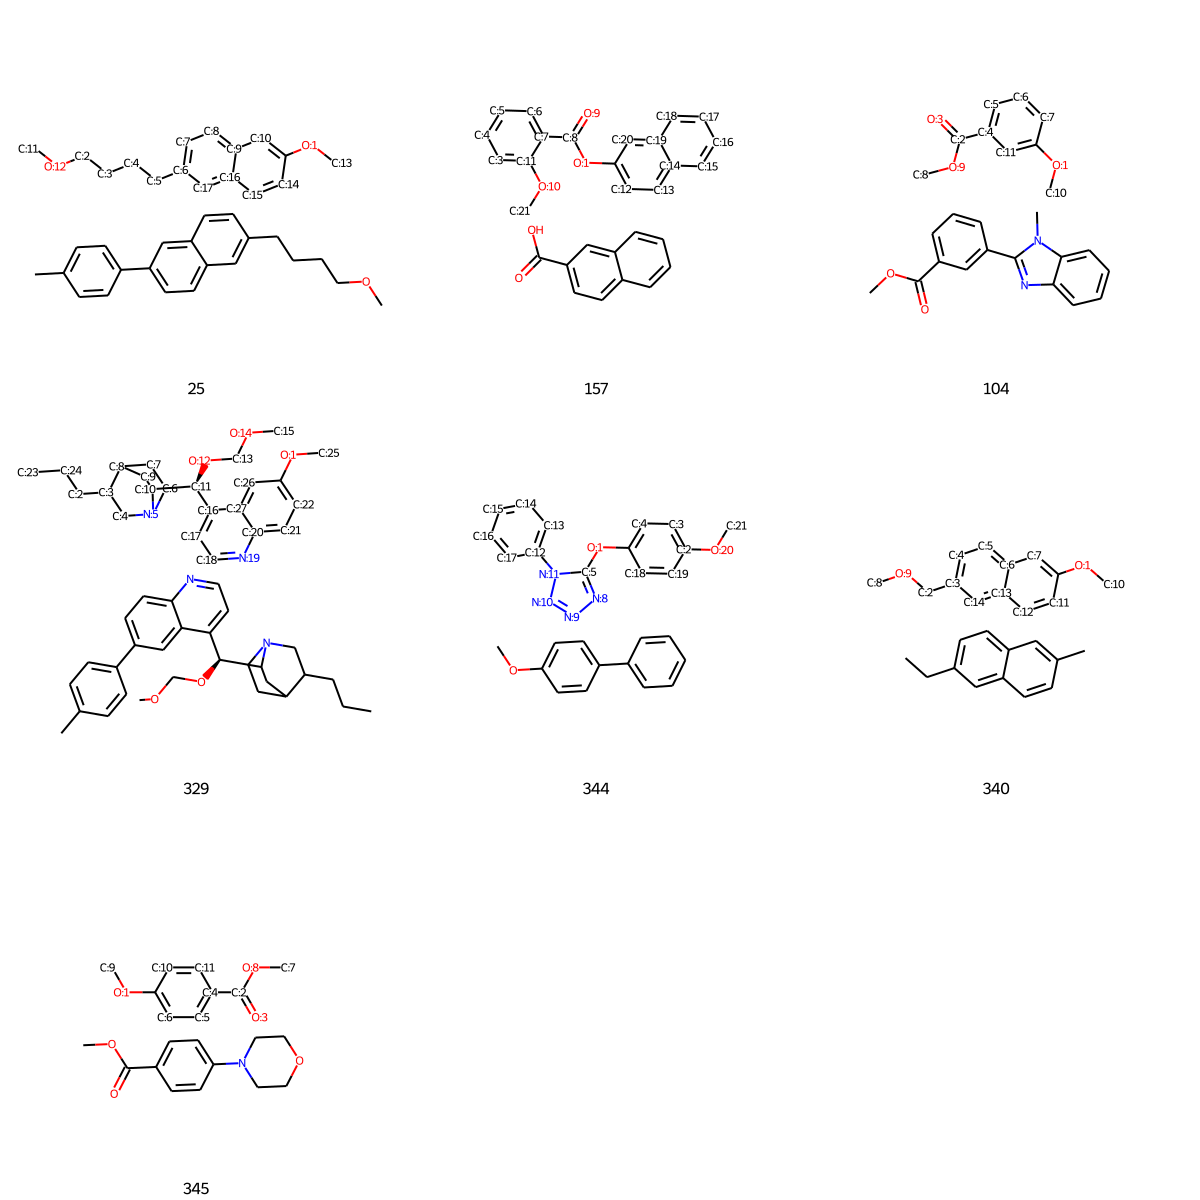

In [58]:
# verification of the wrong indexes
mols_updated = []
for i in id_to_change:
    index = i
    react_prod = str(unik_CO_df.loc[index]["product"] + "." + List_numbered_OC[index][1])
    mols_updated.append(Chem.MolFromSmiles(react_prod))
    
L = [str(i) for i in id_to_change]
#Draw.MolsToGridImage(mols_updated, subImgSize=(400, 400), maxMols = 200, legends = L)

In [60]:
# export data to new .csv
#unik_CO_df.to_csv("../data_csv/fragments_C0O1.csv", sep=',',index=False)

# Number the aromatic atoms C2 to C6

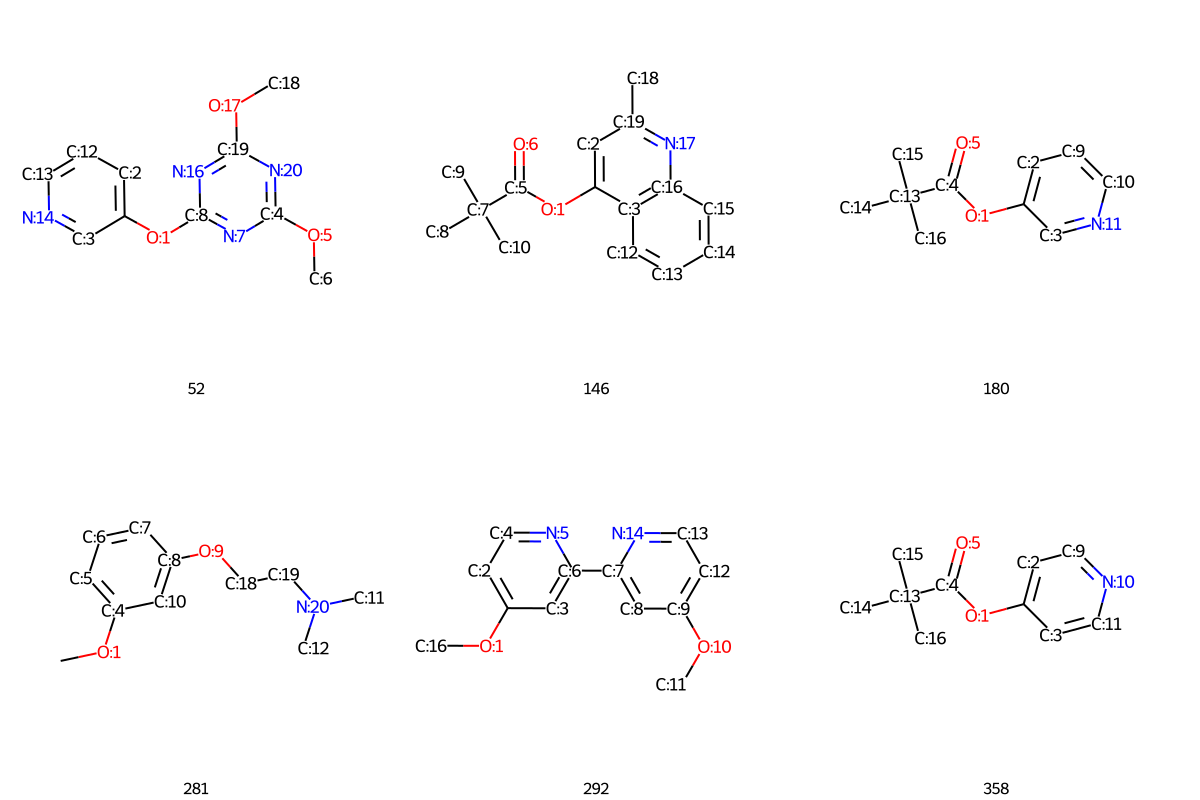

In [2]:
unik_CO_df2 = pd.read_csv("../data_csv/fragments_C0O1.csv", sep=',')
# numerotation of the aromatic atoms
List_numbered_arom = []
for j in range(len(unik_CO_df2)):
    mol = Chem.MolFromSmiles(unik_CO_df2["C0O1_num"][j])
    mol = nb.number_C2C3(mol)
    mol = nb.number_C456(mol)
    mol = nb.number_C2C3(mol)
    List_numbered_arom.append([j, Chem.MolToSmiles(mol)])
    
unik_CO_df2["C0C6_num"] = [List_numbered_arom[i][1] for i in range(len(List_numbered_arom))]

smi_to_renum = []
for i, smi_n in enumerate(unik_CO_df2["C0C6_num"]):
    mol = Chem.MolFromSmiles(smi_n)
    if nb.numbering_arom_fine(mol) == False:
        smi_to_renum.append([i, smi_n])

mols = []
L = []
for i in smi_to_renum:
    mols.append(Chem.MolFromSmiles(i[1]))
    L.append(str(i[0]))
#Draw.MolsToGridImage(mols, subImgSize=(400, 400), maxMols = 200, legends = L)

###### an eventual manual correction can be done and the array with the molecules numbered can be updated
###### In this example molecules : 52, 146, 180, 281, 292, 358 have to be renumbered correctly

c1([O:1][C:9](=[O:10])[C:13]([CH3:14])([CH3:15])[CH3:16])[cH:2][cH:4][n:5][cH:6][cH:3]1


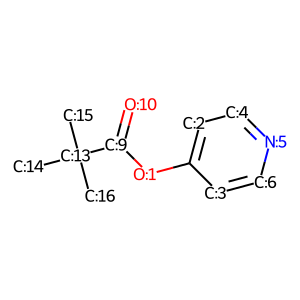

In [43]:
# vary smi_num from 0 to len(smi_to_renum)
smi_num = 0
#print(smi_to_renum[smi_num][1])
#Draw.MolToImage(Chem.MolFromSmiles(smi_to_renum[smi_num][1]))

In [44]:
new_smi = 'c1([O:1][C:9](=[O:10])[C:13]([CH3:14])([CH3:15])[CH3:16])[cH:2][cH:4][n:5][cH:6][cH:3]1'

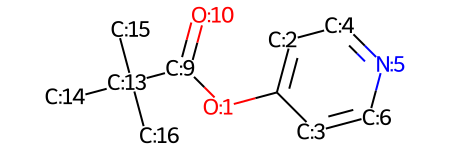

In [45]:
Chem.MolFromSmiles(new_smi)

In [46]:
# if the numerotation above is good update smi_to_renum
smi_to_renum[smi_num][1] = new_smi

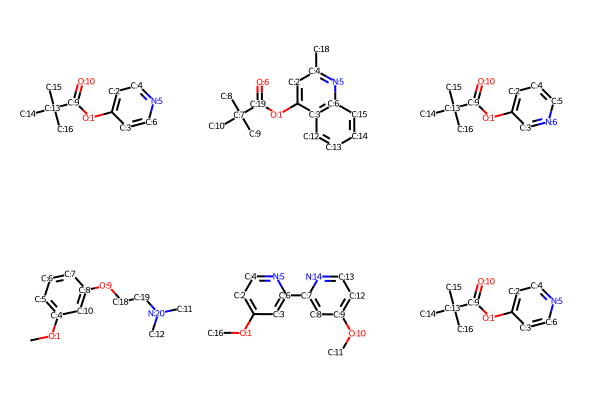

In [47]:
# final check
#Draw.MolsToGridImage([Chem.MolFromSmiles(smi_to_renum[i][1]) for i in range(len(smi_to_renum))])

# Once the correction has been done for all wrong molecules you can update the df

In [52]:
id_to_change = [smi_to_renum[i][0] for i in range(len(smi_to_renum))]
for i in range(len(List_numbered_arom)):
    if List_numbered_arom[i][0] in id_to_change:
        List_numbered_arom[i][1] = smi_to_renum[id_to_change.index(i)][1]
        
unik_CO_df2["C0C6_num"] = [List_numbered_arom[i][1] for i in range(len(List_numbered_arom))]

In [53]:
# export data to new .csv
# unik_CO_df2.to_csv("../data_csv/fragments_C0C6.csv", sep=',',index=False)

# Number the 8th and last atom bounded to the Oxygen

In [2]:
unik_CO_df3 = pd.read_csv("../data_csv/fragments_C0C6.csv", sep=',')

In [3]:
List_numbered_7 = []
for j in range(len(unik_CO_df3)):
    mol = Chem.MolFromSmiles(unik_CO_df3["C0C6_num"][j])
    mol = nb.number_7(mol)
    nb.rescale_atom_map(mol)
    List_numbered_7.append([j, Chem.MolToSmiles(mol)])

In [4]:
#Draw.MolsToGridImage([Chem.MolFromSmiles(List_numbered_7[i][1]) for i in range(len(List_numbered_7))], maxMols=200, subImgSize=(400, 400))

In [5]:
mol_to_reindex = []
for j in range(len(List_numbered_7)):
    if nb.numbering_8_fine(Chem.MolFromSmiles(List_numbered_7[j][1])) == False:
        mol_to_reindex.append([j, List_numbered_7[j][1]])

In [6]:
mol_to_reindex

[[52,
  'c1([O:1][C:7](=[O:10])[C:13]([CH3:8])([CH3:9])[CH3:11])[cH:2][cH:4][n:5][cH:6][cH:3]1'],
 [146,
  'c1([O:1][C:7](=[O:6])[C:11]([CH3:8])([CH3:9])[CH3:10])[cH:2][c:4]([CH3:18])[n:5][c:6]2[c:3]1[cH:12][cH:13][cH:14][cH:15]2'],
 [180,
  'c1([O:1][C:7](=[O:10])[C:13]([CH3:8])([CH3:9])[CH3:11])[cH:2][cH:4][cH:5][n:6][cH:3]1'],
 [281,
  'C[O:1][c:7]1[cH:5][cH:6][cH:2][c:8]([O:9][CH2:13][CH2:4][N:3]([CH3:11])[CH3:12])[cH:10]1'],
 [292,
  'c1([O:1][CH3:7])[cH:2][cH:4][n:5][c:6](-[c:15]2[cH:8][c:9]([O:10][CH3:11])[cH:12][cH:13][n:14]2)[cH:3]1'],
 [358,
  'c1([O:1][C:7](=[O:10])[C:13]([CH3:8])([CH3:9])[CH3:11])[cH:2][cH:4][n:5][cH:6][cH:3]1']]

# Manual correction ...

c1([O:1][C:7](=[O:10])[C:13]([CH3:8])([CH3:9])[CH3:11])[cH:2][cH:4][n:5][cH:6][cH:3]1


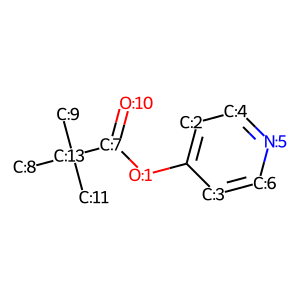

In [27]:
# vary smi_num from 0 to len(mol_to_reindex)
smi_num = 0
print(mol_to_reindex[smi_num][1])
mol = Chem.MolFromSmiles(mol_to_reindex[smi_num][1])
#Draw.MolToImage(mol)

In [18]:
new_smi = 'c1([O:1][C:7](=[O:6])[C:11]([CH3:8])([CH3:9])[CH3:10])[cH:2][c:4]([CH3:18])[n:5][c:6]2[c:3]1[cH:12][cH:13][cH:14][cH:15]2'

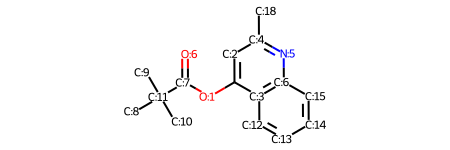

In [19]:
Chem.MolFromSmiles(new_smi)

In [20]:
# if the numerotation above is good update smi_to_renum
mol_to_reindex[smi_num][1] = new_smi

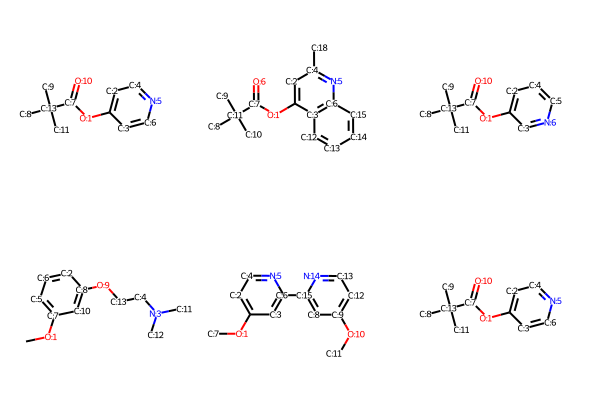

In [30]:
# final check
Draw.MolsToGridImage([Chem.MolFromSmiles(mol_to_reindex[i][1]) for i in range(len(mol_to_reindex))])

In [17]:
# if needed the publication can be check with the function below
df = pd.read_csv('../data_csv/Data_test09032021.csv', sep=',')
nb.show_DOIS(mol, df)

['https://doi.org/10.1021/acs.orglett.6b02656']

In [31]:
id_to_change = [mol_to_reindex[i][0] for i in range(len(mol_to_reindex))]
for i in range(len(List_numbered_7)):
    if List_numbered_7[i][0] in id_to_change:
        List_numbered_7[i][1] = mol_to_reindex[id_to_change.index(i)][1]
        
unik_CO_df3["C0C7_num"] = [List_numbered_7[i][1] for i in range(len(List_numbered_7))]

In [32]:
# export data to new .csv
#unik_CO_df3.to_csv("../data_csv/fragments_0-7.csv", sep=',',index=False)